<IPython.core.display.Javascript object>


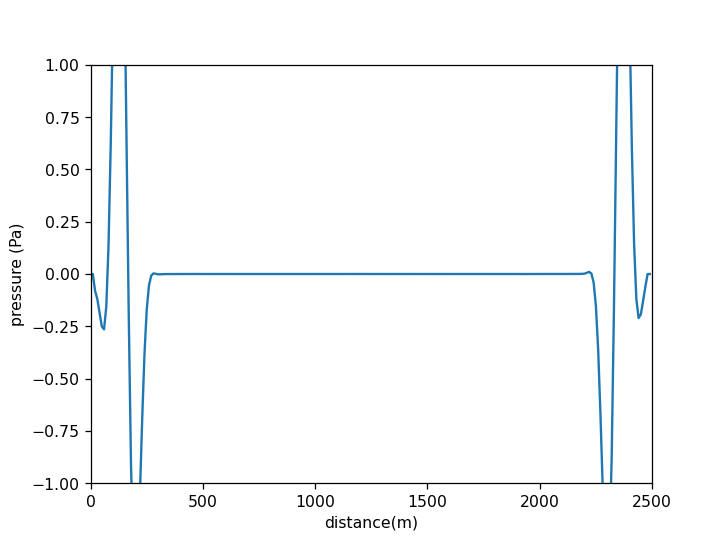

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# PARAMETERS
Nx = 250
dx = 10
x = np.arange(0, Nx * dx, dx)
SRCNX = 0  # source position (Python indexing starts from 0)
SRCNY = Nx // 2
T = 1000
dt = 0.001
f = 10
t0 = 0.1
c = 2000
r = 2300
const1 = r * (c ** 2) / dx
const2 = 1.0 / (dx * r)

# FIELD VARIABLES
p0 = np.zeros(Nx)
p2 = np.zeros(Nx)
v0 = np.zeros(Nx)
v2 = np.zeros(Nx)

# PML boundary conditions
d0 = 150
w = 15
a = np.arange(1, w + 1)
b = np.flip(a)
sigma = np.zeros(Nx)
sigma[:w] = d0 * ((b / w) ** 2)
sigma[Nx - w:Nx] = d0 * ((a / w) ** 2)

# Function to calculate Ricker wavelet pulse
def ricker_wavelet(frequency, time, t0):
    t = time - t0
    return (1.0 - 2.0 * (np.pi ** 2) * (frequency ** 2) * (t ** 2)) * np.exp(-1.0 * (np.pi ** 2) * (frequency ** 2) * (t ** 2))

# Create a figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, Nx * dx)
ax.set_ylim(-1, 1)
line, = ax.plot(x, p2)

# Function to update the plot for each frame of the animation
def update(frame):
    global p0, p2, v0, v2
    t = frame * dt
    
    for i in range(2, Nx - 2):
        v2[i] = ((2.0 * dt) / (2.0 + sigma[i] * dt)) * (
                v0[i] * ((2.0 - sigma[i] * dt) / (2.0 * dt)) -
                const2 * (p0[i + 1] - p0[i])
        )
        p2[i] = ((2.0 * dt) / (2.0 + sigma[i] * dt)) * (
                p0[i] * ((2.0 - sigma[i] * dt) / (2.0 * dt)) -
                const1 * (v2[i] - v2[i - 1])
        )
    
    # Add Ricker wavelet pulse as the source at the specified position
    p2[SRCNY] += ricker_wavelet(f, t, t0)
    
    p0 = np.copy(p2)
    v0 = np.copy(v2)
    
    p0[1] = 0
    p2[1] = 0
    
    line.set_ydata(p2)
    return line,

# Create the animation
animation = FuncAnimation(fig, update, frames=T, blit=True)

# Show the animation
plt.xlabel('distance(m)')
plt.ylabel('pressure (Pa)')
plt.show()
